# Simple demonstration of cross fold validation with decision tree and Naive Bayes

#Decision Tree


---



In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
import pydotplus

In [ ]:
df = pd.read_excel("/content/Credit card approval.xls")
df.head()

,A1:,A2:,A3:,A4:,A5:,A6:,A7:,A8:,A9:,A10:,A11:,A12:,A13:,A14:,A15:,"A16: +,- (class attribute)"
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [ ]:
df.isna().sum()

    A1:                                   0
    A2:                                   0
    A3:                                   0
    A4:                                   0
    A5:                                   0
    A6:                                   0
    A7:                                   0
    A8:                                   0
    A9:                                   0
    A10:                                  0
    A11:                                  0
    A12:                                  0
    A13:                                  0
    A14:                                  0
    A15:                                  0
    A16: +,-         (class attribute)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0       A1:                                 690 non-null    object 
 1       A2:                                 690 non-null    object 
 2       A3:                                 690 non-null    float64
 3       A4:                                 690 non-null    object 
 4       A5:                                 690 non-null    object 
 5       A6:                                 690 non-null    object 
 6       A7:                                 690 non-null    object 
 7       A8:                                 690 non-null    float64
 8       A9:                                 690 non-null    object 
 9       A10:                                690 non-null    object 
 10      A11:                                690 non-null    int64 

In [ ]:
for j in df.columns:
  if(df[j].dtype=="object"):
    x=df[j].unique()
    d={}
    for i in range(len(x)):
      d[x[i]]=i
    df=df.replace({j:d})
df.head()

,A1:,A2:,A3:,A4:,A5:,A6:,A7:,A8:,A9:,A10:,A11:,A12:,A13:,A14:,A15:,"A16: +,- (class attribute)"
0,0,0,0.000,0,0,0,0,1.25,0,0,1,0,0,0,0,0
1,1,1,4.460,0,0,1,1,3.04,0,0,6,0,0,1,560,0
2,1,2,0.500,0,0,1,1,1.50,0,1,0,0,0,2,824,0
3,0,3,1.540,0,0,0,0,3.75,0,0,5,1,0,3,3,0
4,0,4,5.625,0,0,0,0,1.71,0,1,0,0,1,4,0,0


In [ ]:
X=np.array(df.iloc[:,0:len(df.columns)-1])
Y=np.array(df.iloc[:,len(df.columns)-1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

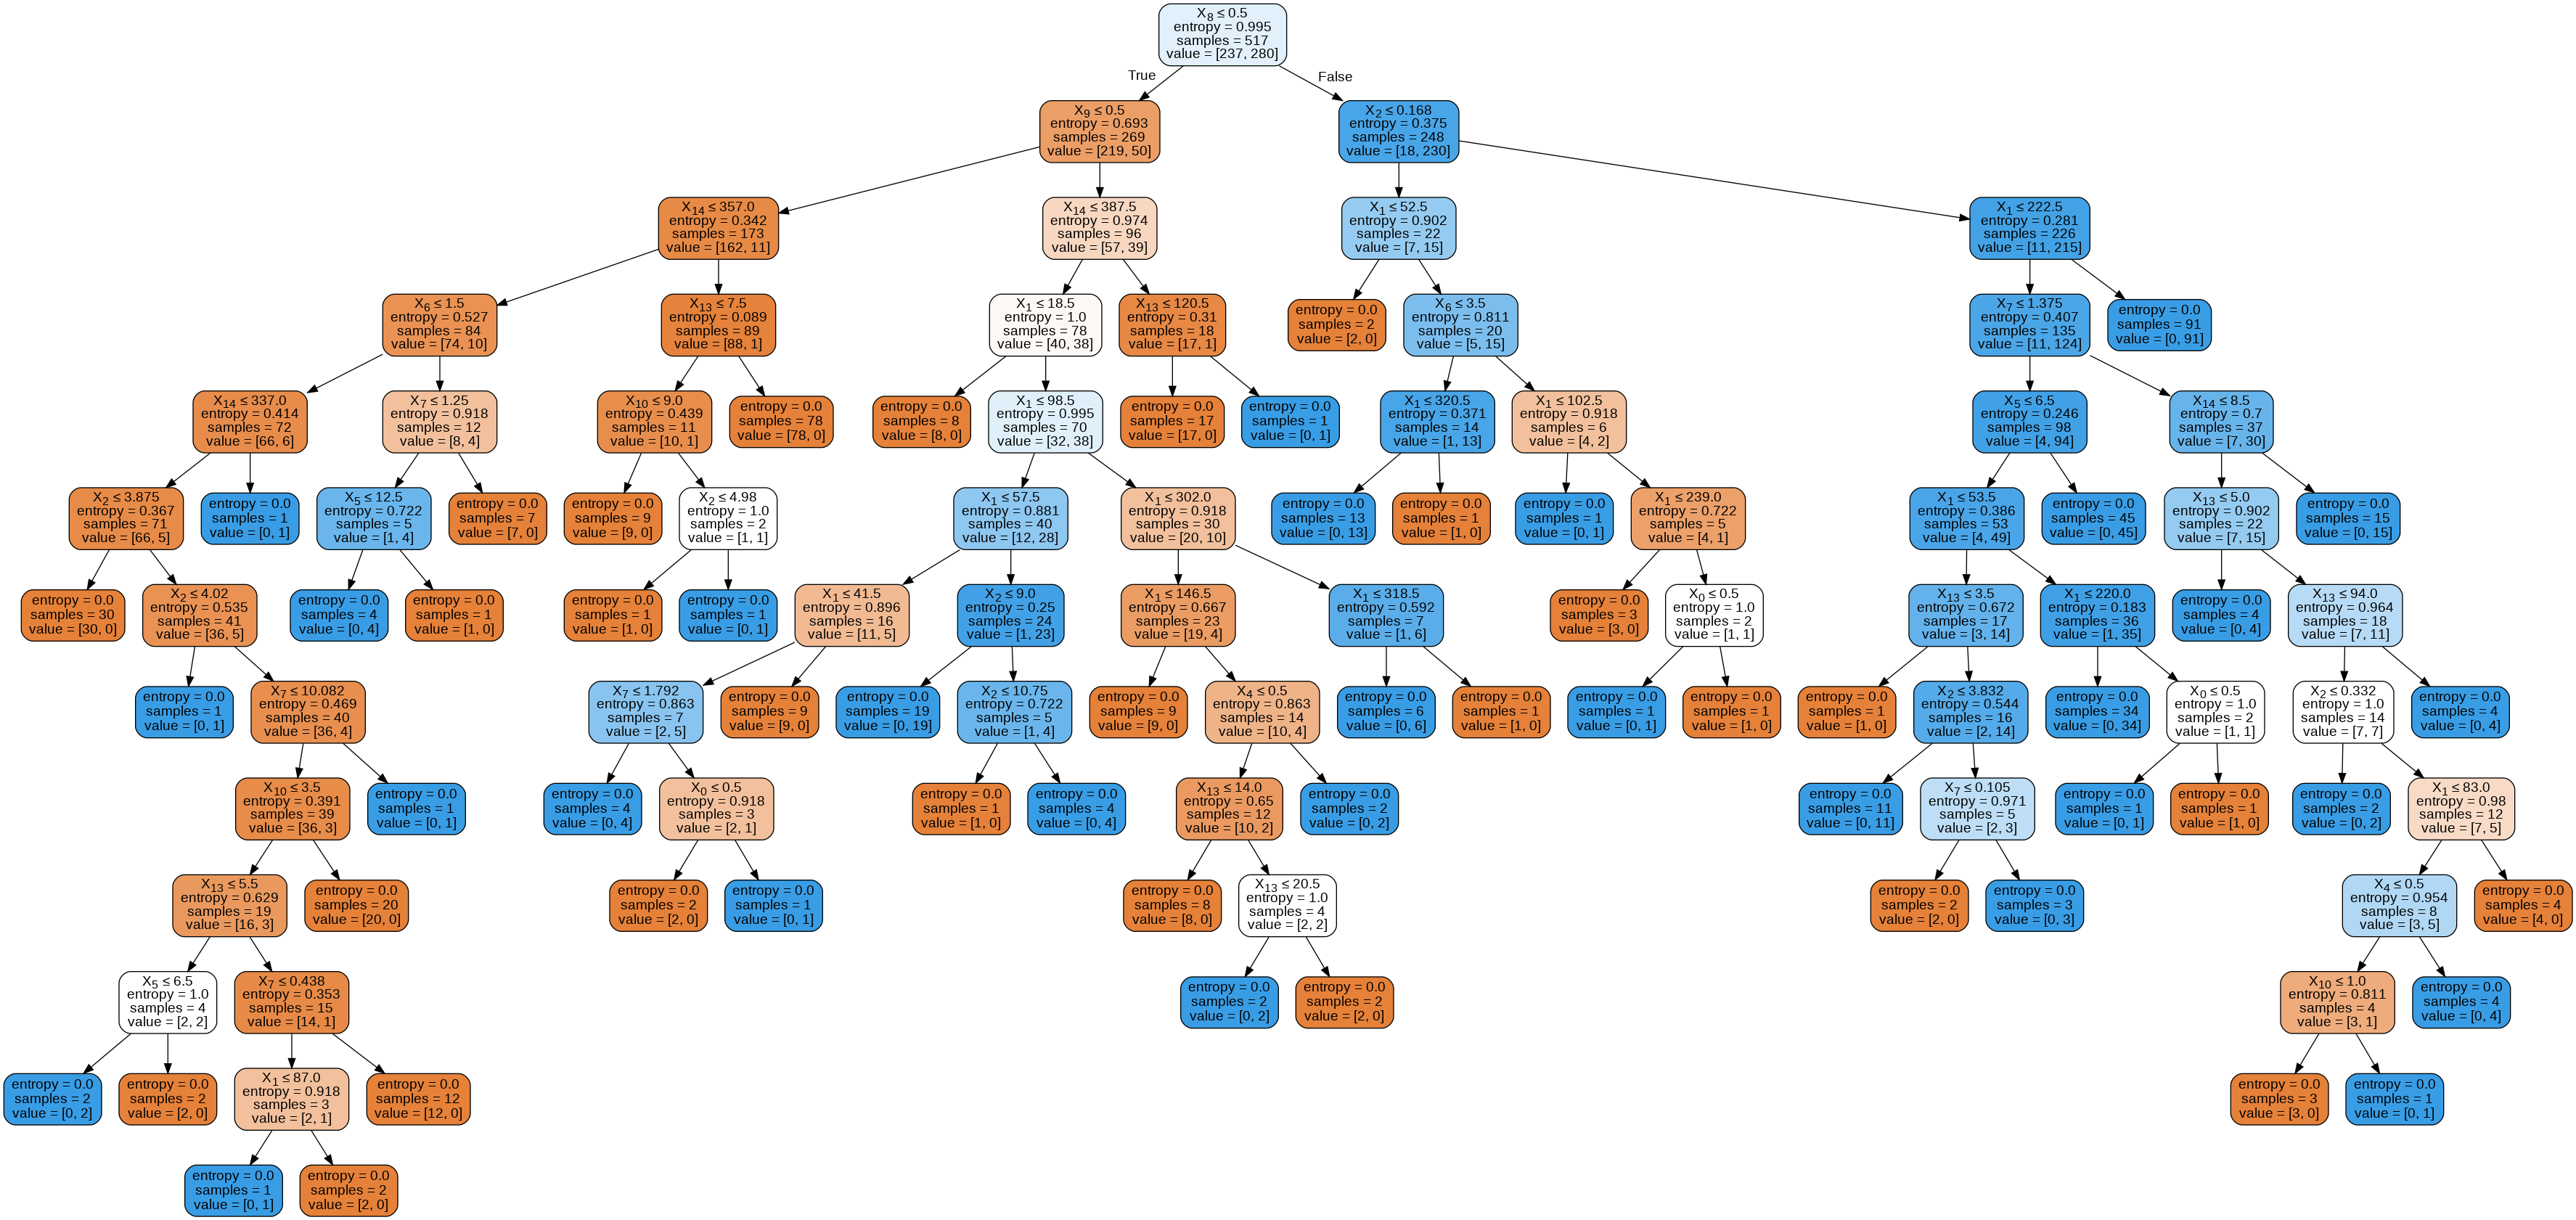

In [ ]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
               filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=800, height=300)

In [ ]:
pred=dt.predict(X_test)
res={}
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(y_test, pred))
res['accuracy']=metrics.accuracy_score(y_test, pred)

Accucary: 0.838150289017341


In [ ]:
from sklearn.metrics import precision_score
average_precision = precision_score(y_test, pred)

print('precision score: {0:0.2f}'.format(
      average_precision))
res['precision']=average_precision

precision score: 0.89


In [ ]:
from sklearn.metrics import recall_score as rs
recal=rs(y_test,pred)
print("recall: ",recal)
res['recall']=recal

recall:  0.8349514563106796


In [ ]:
from sklearn.metrics import f1_score as fs
f1=fs(y_test,pred)
print("f1 score: ",f1)
res['f1']=f1

f1 score:  0.86


In [ ]:
confusion_matrix(y_test,pred)

array([[59, 11],
       [17, 86]])

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [ ]:
probs=dt.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)

AUC: 0.84


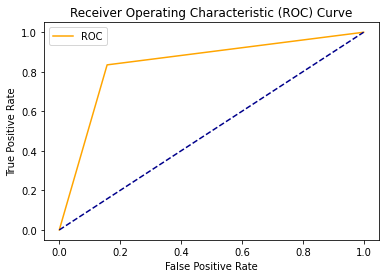

In [ ]:
plot_roc_curve(fpr, tpr)

In [ ]:
scores=[]
d={}
cv = KFold(n_splits=5)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    dt.fit(X_train, y_train)
    scores.append(dt.score(X_test, y_test))
    t=[]
    t.append(X_train)
    t.append(y_train)
    t.append(X_test)
    t.append(y_test)
    scores.append(dt.score(X_test, y_test))
    d[dt.score(X_test, y_test)]=t
v=max(d.keys())
scores

[0.644927536231884,
 0.644927536231884,
 0.8043478260869565,
 0.8043478260869565,
 0.9057971014492754,
 0.9057971014492754,
 0.7898550724637681,
 0.7898550724637681,
 0.8115942028985508,
 0.8115942028985508]

In [ ]:
dt.fit(d[v][0],d[v][1])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

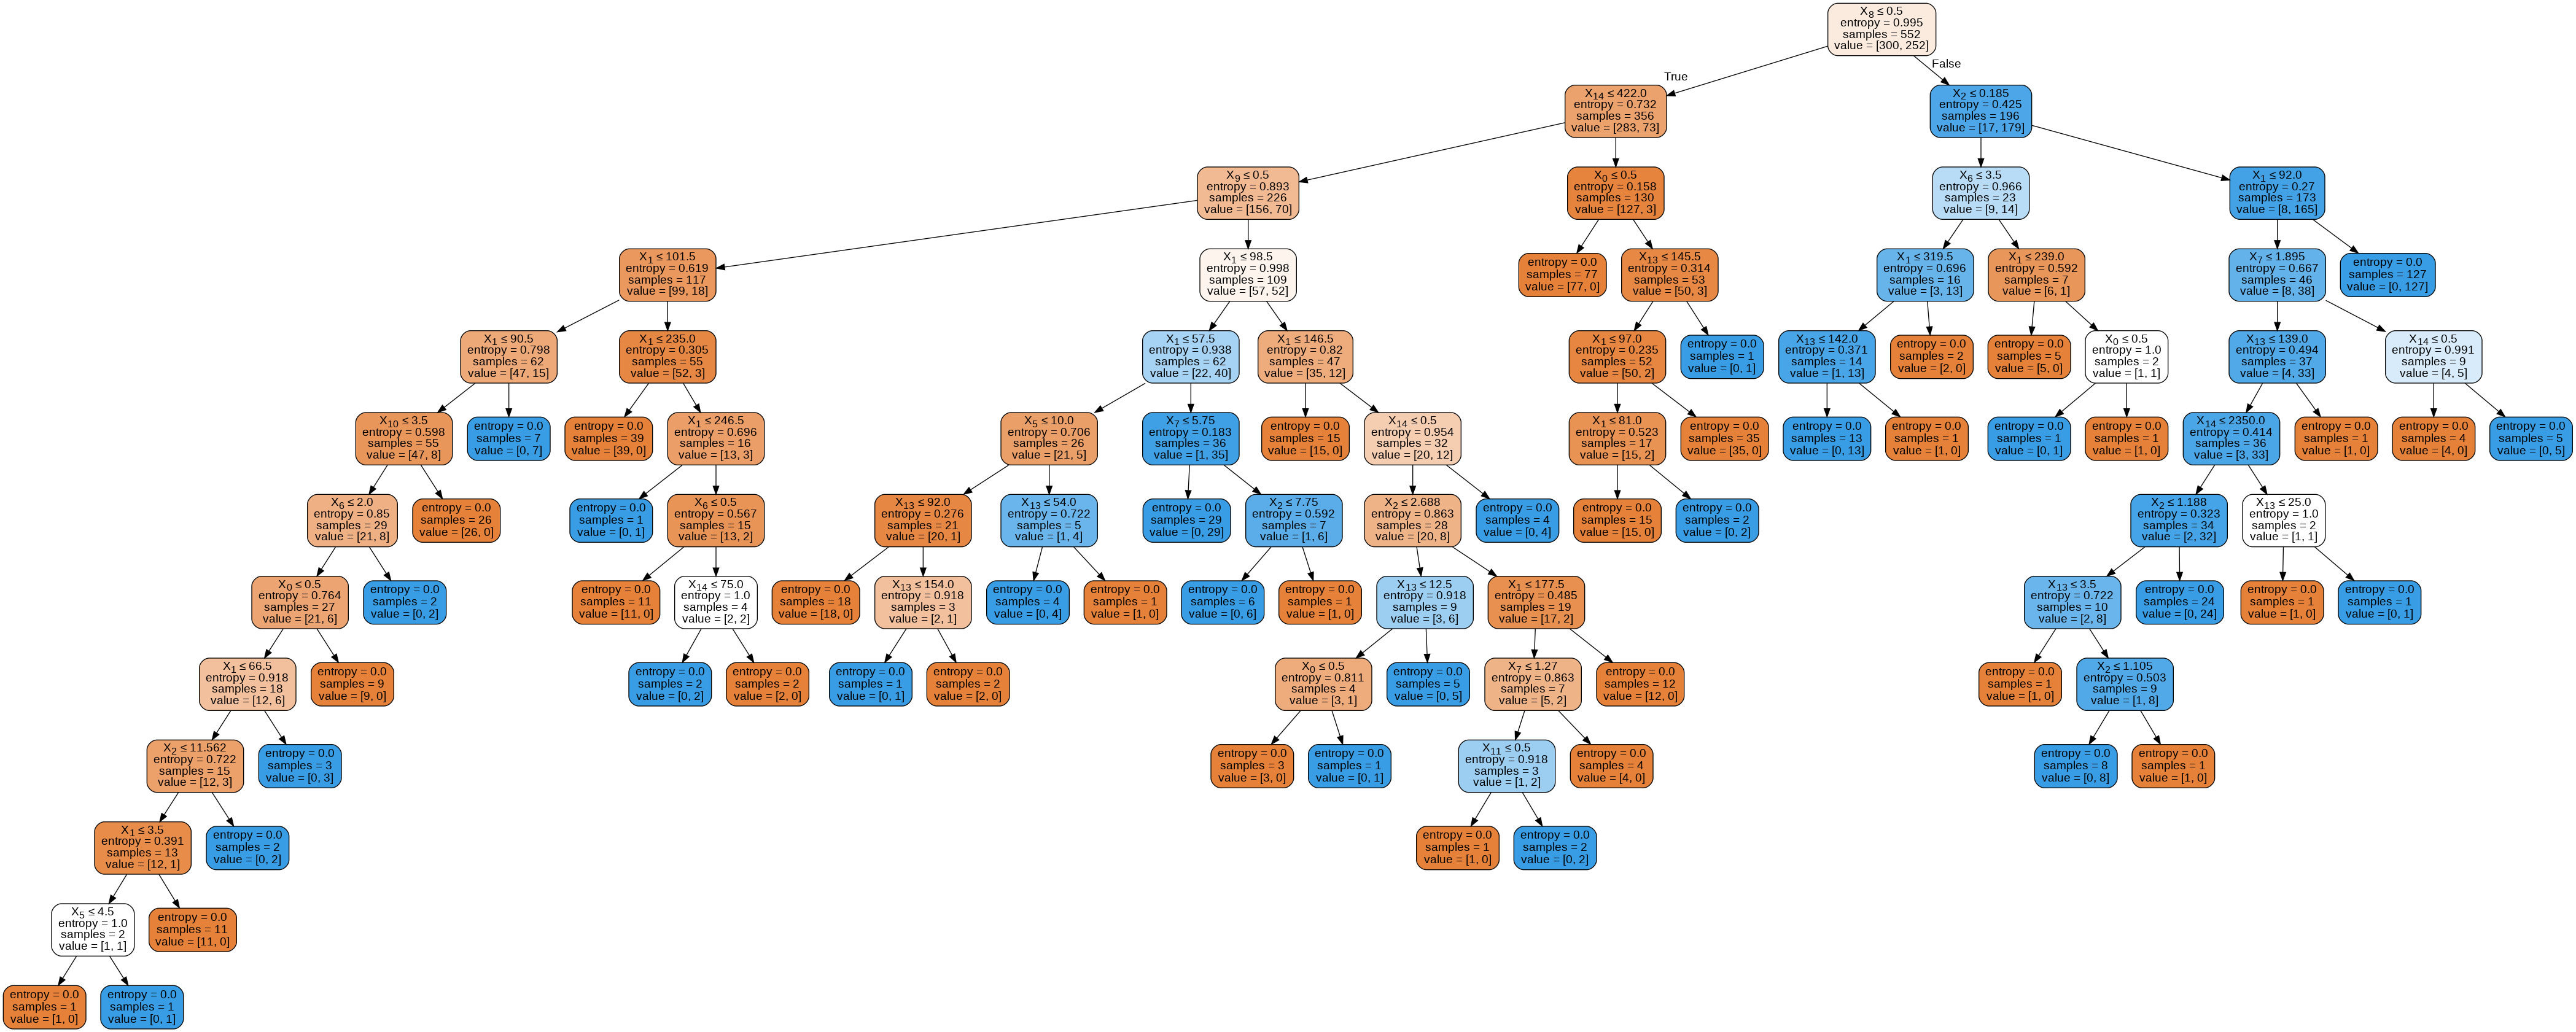

In [ ]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
               filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=800, height=300)

In [ ]:
pred=dt.predict(d[v][2])
resc={}
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(d[v][3], pred))
resc['accuracy']=metrics.accuracy_score(d[v][3], pred)

Accucary: 0.8985507246376812


In [ ]:
from sklearn.metrics import precision_score
average_precision = precision_score(d[v][3], pred)

print('precision score: {0:0.2f}'.format(
      average_precision))
resc['precision']=average_precision

precision score: 0.95


In [ ]:
from sklearn.metrics import recall_score as rs
recal=rs(d[v][3], pred)
print("recall: ",recal)
resc['recall']=recal

recall:  0.9389312977099237


In [ ]:
from sklearn.metrics import f1_score as fs
f1=fs(d[v][3],pred)
print("f1 score: ",f1)
resc['f1']=f1

f1 score:  0.9461538461538462


In [ ]:
confusion_matrix(d[v][3], pred)

array([[  1,   6],
       [  8, 123]])

In [ ]:
probs=dt.predict_proba(d[v][2])
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)

AUC: 0.52


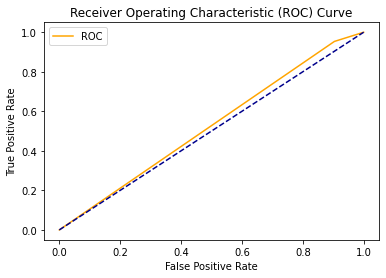

In [ ]:
plot_roc_curve(fpr, tpr)

# Naive bayes

---



In [ ]:
X=np.array(df.iloc[:,0:len(df.columns)-1])
Y=np.array(df.iloc[:,len(df.columns)-1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
gnb=GaussianNB()
gnb.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
pred=gnb.predict(X_test)
pred

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
resnb={}
print('Accucary:', metrics.accuracy_score(y_test, pred))
resnb['accuracy']=metrics.accuracy_score(y_test, pred)
average_precision = precision_score(y_test, pred)
print('precision score: {0:0.2f}'.format(
      average_precision))
resnb['precision']=average_precision
recal=rs(y_test,pred)
print("recall: ",recal)
resnb['recall']=recal
f1=fs(y_test,pred)
print("f1 score: ",f1)
resnb['f1']=f1
confusion_matrix(y_test,pred)

Accucary: 0.8092485549132948
precision score: 0.77
recall:  0.9239130434782609
f1 score:  0.8374384236453201


array([[55, 26],
       [ 7, 85]])

In [ ]:
probs=gnb.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)

AUC: 0.90


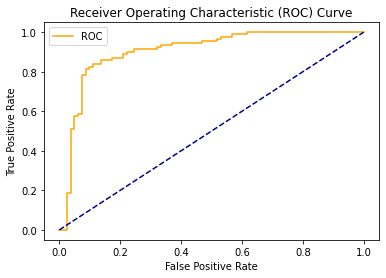

In [ ]:
plot_roc_curve(fpr, tpr)

In [ ]:
scores=[]
d={}
cv = KFold(n_splits=5)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    gnb.fit(X_train, y_train)
    scores.append(gnb.score(X_test, y_test))
    t=[]
    t.append(X_train)
    t.append(y_train)
    t.append(X_test)
    t.append(y_test)
    scores.append(gnb.score(X_test, y_test))
    d[gnb.score(X_test, y_test)]=t
v=max(d.keys())
scores

[0.6739130434782609,
 0.6739130434782609,
 0.644927536231884,
 0.644927536231884,
 0.9057971014492754,
 0.9057971014492754,
 0.7971014492753623,
 0.7971014492753623,
 0.8260869565217391,
 0.8260869565217391]

In [ ]:
gnb.fit(d[v][0],d[v][1])

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
pred=gnb.predict(d[v][2])
rescnb={}
print('Accucary:', metrics.accuracy_score(d[v][3], pred))
rescnb['accuracy']=metrics.accuracy_score(d[v][3], pred)
average_precision = precision_score(d[v][3], pred)
print('precision score: {0:0.2f}'.format(
      average_precision))
rescnb['precision']=average_precision
recal=rs(d[v][3], pred)
print("recall: ",recal)
rescnb['recall']=recal
f1=fs(d[v][3],pred)
print("f1 score: ",f1)
rescnb['f1']=f1
confusion_matrix(d[v][3], pred)

Accucary: 0.9057971014492754
precision score: 0.96
recall:  0.9389312977099237
f1 score:  0.9498069498069499


array([[  2,   5],
       [  8, 123]])

In [ ]:
probs=gnb.predict_proba(d[v][2])
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)

AUC: 0.59


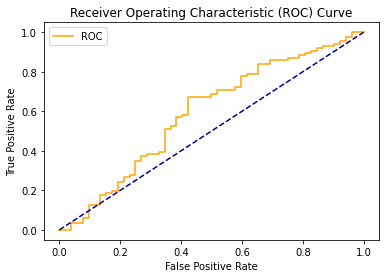

In [ ]:
plot_roc_curve(fpr, tpr)

#comparision of different methods

In [ ]:
data=pd.DataFrame()
data['metrics']=res.keys()
data['decision tree']=res.values()
data['5 fold of dt']=resc.values()
data['Naive bayes']=resnb.values()
data['5 fold of NB']=rescnb.values()
data.head()

,metrics,decision tree,5 fold of dt,Naive bayes,5 fold of NB
0,accuracy,0.838150,0.898551,0.809249,0.905797
1,precision,0.886598,0.953488,0.765766,0.960938
2,recall,0.834951,0.938931,0.923913,0.938931
3,f1,0.860000,0.946154,0.837438,0.949807
